In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [2]:
#file name
fname="correction_factor.tsv"
#assay date & name
asname="21xxxx_molecule_for_cf"

#absorbance max for a molecule
wl=609
#absorbance for what you want to know
interest=260

In [3]:
test=[]
with open(fname) as file:
    tsv_file=csv.reader(file,delimiter='\t')
    for line in tsv_file:
        test.append(line)
        
num=int((test.count([])/2)+1)
line_num=test.index([])

data=[]
for i in range(num):
    data.append(test[i*(line_num+2):line_num+i*(line_num+2)])

dfs=[]
for i in range(num):
    df=pd.DataFrame(data[i])
    df.columns=[data[i][2][0],data[i][0][0]]
    df=df.drop(df.index[0:3])
    df=df.astype({data[i][2][0]:int,
                  data[i][0][0]:np.float})
    dfs.append(df)
    if i>0:
        dfs[i].drop(data[i][2][0],axis='columns',inplace=True)

result=pd.concat(dfs,axis=1)
result=result.reset_index(drop=True)

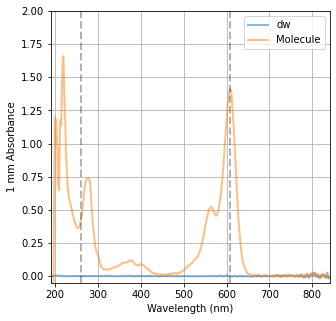

In [4]:
fig, ax=plt.subplots(figsize=(5,5))
x=result.loc[:,['Wavelength (nm)']]

yval=result.drop(["Wavelength (nm)"],axis=1)

for i in yval.columns:
    y=yval.loc[:,[i]]
    ax.plot(x,y,label=i, alpha=0.5, linewidth=2)

#line
plt.axvline(wl, color='black', linestyle='--', linewidth=2, alpha=0.3)
plt.axvline(interest, color='black', linestyle='--', linewidth=2, alpha=0.3)

plt.ylim (-0.05,2)
plt.xlim (190,840)
plt.xlabel('Wavelength (nm)')
plt.ylabel('1 mm Absorbance')
plt.legend()
plt.grid(True)
plt.savefig(asname+'.png')
plt.show()

In [5]:
abs_data=[]
for j in yval.columns:
    abs_data.append(yval.loc[wl-x.loc[0][0],[j]].values)

interest_data=[]
for k in yval.columns:
    interest_data.append(yval.loc[interest-x.loc[0][0],[k]].values)

def cf(a,b):
    return b/a

corr_data=[]
for l in range(num):
    corr_data.append(cf(abs_data[l],interest_data[l]))

final=pd.DataFrame(corr_data,index=yval.columns.values,columns=['Correction factor'])
final.to_csv(asname+'_final.csv',encoding='utf-8')
final

,Correction factor
dw,0.500000
Molecule,0.291578
